In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

227
28


In [3]:
# data_file_path

In [4]:
#发作为1；未发作为0
y_train=[]
for i in train_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in test_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

227
127
28
24


In [5]:
#因为改成了16通道，所以此处*16
#每16s数据截成8段2s，所以y也要变成8*17倍长度
# 截成 4段4s，y变成4*17的长度
# 改成 2段8s，y变成2*17的长度
# 直接16s，y长度为1*17
y_long_data=[]
for i in y_train:
    for j in range(4*16):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

14528


In [6]:
#改成*16
y_long_test_data=[]
for i in y_test:
    for j in range(8*16):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

3584


In [7]:
#选择16通道
import scipy.signal
import scipy.io as scio    
channels_selected=16
samps = 2

In [8]:
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for k in range(channels_selected):
        data_channel = data[k]
        for j in range(0,8,samps):
            data_temp = data_channel[j*256:(j+samps)*256]
            x_train.append(data_temp)

Opening raw data file ../SE_train_processed\Z何富桂20220221_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302_bias_0.fif...
Isotrak not found


<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220225_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220228_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220511_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220516_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220518_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220520（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220520（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220520（未发作）_bias_24.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw dat

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z何金蓓20220511_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z何金蓓20220516_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z何金蓓20220518_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）_bias_24.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220316_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220225_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220302_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘浩天20220513_bias_0.fif...
Isotrak not 

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）_bias_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220316_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.f

Opening raw data file ../SE_train_processed\Z周牧涵20220516（未发作）_bias_24.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周牧涵20220516（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周牧涵20220518_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220225_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220304_bias_0.fif...
Isotrak not 

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z周牧涵20220516（未发作）_bias_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z周牧涵20220516（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z周牧涵20220518_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.f

    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李振千20220610_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李振千20220613_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李玉萍20220216_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李玉萍20220218_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李玉萍20220221（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李玉萍20220221（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z李振千20220610_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z李振千20220613_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z李玉萍20220216_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z柯志祥20220406_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z柯志祥20220411_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z柯志祥20220413_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z柯志祥20220420_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening r

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220228_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z柯志祥20220406_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, ra

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王胜银20220513（未发作）_bias_24.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王胜银20220513（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王胜银20220516_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王胜银20220520_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王莹20220413_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王莹20220415_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Openi

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z王胜银20220513（未发作）_bias_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z王胜银20220513（未发作）_bias_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z王胜银20220513（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _

Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）_bias_24.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z裴瑞婷20220420_bias_0.fif...
I

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）_bias_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）_bias_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _

Opening raw data file ../SE_train_processed\Z陈琳20220513（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220516_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220518（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220518（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220518（未发作）_bias_24.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220518（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220321_bias_0.fif...
Iso

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z陈琳20220513（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z陈琳20220516_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z陈琳20220518（未发作）_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, 

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220223_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220225_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220302_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z龙园芳20220509_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z龙园芳20220511（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening r

<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220316_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220223_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-b97792d44def>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220225_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

In [9]:
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for k in range(channels_selected):
        data_channel = data[k]
        for j in range(0,16,samps):
            data_temp = data_channel[j*256:(j+samps)*256]
            x_test.append(data_temp)

Opening raw data file ../SE_test_processed\Z南添仁20220509.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z南添仁20220511.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z南添仁20220513.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z南添仁20220516.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220318.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220321.fif...


<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z南添仁20220509.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z南添仁20220511.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z南添仁20220513.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220323.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220325.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z张璐20220225.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z张璐20220228.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z张璐20220302.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z杜娇20220316.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z杜娇20220318.fif...
Isot

<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220323.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220325.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z赵丽兰20220228.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z赵丽兰20220302.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z赵丽兰20220304.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z邵子健20220511（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z邵子健20220516（未发作）.fif...


<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z赵丽兰20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z赵丽兰20220302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z赵丽兰20220304.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z邵子健20220518.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z陈莎莎20220418（硬件问题）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z陈莎莎20220422.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z陈莎莎20220425（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z邵子健20220516（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z邵子健20220518.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-35c44af40944>:3: RuntimeWarning: This filename (../SE_test_processed\Z陈莎莎20220418（硬件问题）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.

In [10]:
#16*227*(8/2)
len(x_train) 

14528

In [11]:
#16*28*(16/2)
len(x_test)

3584

In [12]:
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
df_train

,parameter
0,1
1,4
2,3
3,2
4,4
...,...
222,2
223,1
224,1
225,1


In [13]:
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test

,parameter
0,1
1,2
2,3
3,4
4,3
5,2
6,1
7,4
8,2
9,3


In [14]:
# 引入刺激参数
ECT_code = []

for i in range(df_train.shape[0]):
    if df_train.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_train.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_train.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_train.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#改成了16通道，且每个通道只有4组2s
long_ECT_code = [i for i in ECT_code for k in range(4*16)]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(14528, 2)

In [15]:
# 引入刺激参数
test_ECT_code = []

for i in range(df_test.shape[0]):
    if df_test.iloc[i,0] == 1:
        test_ECT_code.append([0,0])
    if df_test.iloc[i,0] == 2:
        test_ECT_code.append([0,1])
    if df_test.iloc[i,0] == 3:
        test_ECT_code.append([1,0])
    if df_test.iloc[i,0] == 4:
        test_ECT_code.append([1,1])

test_ECT_code = np.array(test_ECT_code)
#改成了16通道
long_ECT_code_test = [i for i in test_ECT_code for k in range(8*16)]
long_ECT_code_test = np.array(long_ECT_code_test)
long_ECT_code_test.shape

(3584, 2)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [45]:
# 每次都要记得更改输入的shape
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(512,1))#单通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(input1)
pool1=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv1)#64*256

conv2=tf.keras.layers.Conv1D(32,5,padding='same',activation='relu')(pool1)
pool2=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv2)#32*128

conv3=tf.keras.layers.Conv1D(16,3,padding='same',activation='relu')(pool2)
pool3=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv3)#16*64

flatten1=tf.keras.layers.Flatten()(pool3)

dense1=tf.keras.layers.Dense(256,activation='relu')(flatten1)
drop1=tf.keras.layers.Dropout(0.5)(dense1)
dense2=tf.keras.layers.Dense(64,activation='relu')(drop1)

dense22=tf.keras.layers.Dense(20,activation='relu')(input2)
dense23=tf.keras.layers.Dense(10,activation='relu')(dense22)

concatenate1=tf.keras.layers.Concatenate()([dense2,dense23])

dense3=tf.keras.layers.Dense(20,activation='sigmoid')(concatenate1)
# dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(dense3)

# model=tf.keras.models.Model(inputs=input1,outputs=out)
model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [46]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 512, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 512, 64)      384         input_9[0][0]                    
__________________________________________________________________________________________________
average_pooling1d_12 (AveragePo (None, 256, 64)      0           conv1d_12[0][0]                  
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 256, 32)      10272       average_pooling1d_12[0][0]       
____________________________________________________________________________________________

In [47]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics='accuracy'
             )

In [48]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)

In [49]:
#方便命名模型
my_epochs=45
my_batch_size=16
my_validation_split=0.2
history = model.fit([x_train,long_ECT_code], y_train, 
                    batch_size = my_batch_size,epochs = my_epochs,verbose = 1,
                    validation_split = my_validation_split,  
                    shuffle=True
                   )

Epoch 1/45
727/727 [==============================] - 9s 12ms/step - loss: 0.2239 - accuracy: 0.6259 - val_loss: 0.2753 - val_accuracy: 0.5065
Epoch 2/45
727/727 [==============================] - 10s 14ms/step - loss: 0.2164 - accuracy: 0.6536 - val_loss: 0.2744 - val_accuracy: 0.4890
Epoch 3/45
727/727 [==============================] - 10s 14ms/step - loss: 0.2124 - accuracy: 0.6624 - val_loss: 0.2780 - val_accuracy: 0.4893
Epoch 4/45
727/727 [==============================] - 10s 14ms/step - loss: 0.2060 - accuracy: 0.6795 - val_loss: 0.2903 - val_accuracy: 0.5000
Epoch 5/45
727/727 [==============================] - 10s 14ms/step - loss: 0.1968 - accuracy: 0.6988 - val_loss: 0.2980 - val_accuracy: 0.4959
Epoch 6/45
727/727 [==============================] - 10s 14ms/step - loss: 0.1875 - accuracy: 0.7167 - val_loss: 0.2920 - val_accuracy: 0.4993
Epoch 7/45
727/727 [==============================] - 10s 14ms/step - loss: 0.1755 - accuracy: 0.7434 - val_loss: 0.3047 - val_accuracy: 

In [50]:
x_train.shape

(14528, 512)

In [51]:
y_train.shape

(14528,)

In [52]:
loss_,acc_ = model.evaluate([x_train,long_ECT_code],y_train)

454/454 [==============================] - 3s 7ms/step - loss: 0.0846 - accuracy: 0.8987


In [53]:
x_test=np.array(x_test)
y_test=np.array(y_test)#方便实用validation_split
long_ECT_code_test = np.array(long_ECT_code_test)
loss_,acc_ = model.evaluate([x_test,long_ECT_code_test],y_test)

112/112 [==============================] - 1s 7ms/step - loss: 0.3406 - accuracy: 0.5876


In [54]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(acc) + 1)

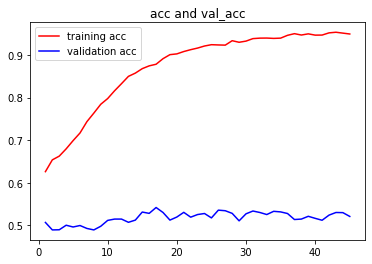

In [55]:
import matplotlib.pyplot as plt
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.legend()#显示左上角的图例
plt.savefig("../img/Accuracy_ECT_16S.jpg")
plt.show()

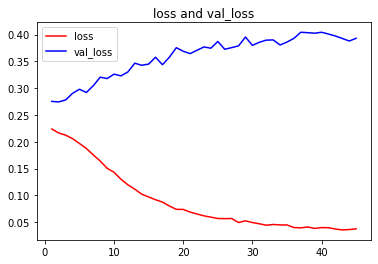

In [56]:
plt.title('loss and val_loss')
plt.plot(epochs, loss, 'red', label='loss')
plt.plot(epochs, val_loss, 'blue', label='val_loss')
plt.legend()
plt.savefig("../img/Loss_ECT_16S.jpg")
plt.show()

In [29]:
model.save('../model_save/'+model.name + "_ECT+16s_"+str(my_batch_size) + '_'+str(my_epochs)+'_'+str(my_validation_split)
           +'_'+str(acc_)[:8] + "_.h5")